In [2]:
from Maze import Maze
from sarsa_agent import SarsaAgent
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [ ]:
# arr=np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#              ],dtype=float)

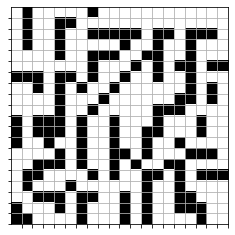

In [85]:
# arr=np.array([[0,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,0]],dtype=float)
arr=np.array([[0,0,0,0,0,0,1,0,0,0],
              [0,1,0,0,1,0,1,0,0,0],
              [0,1,0,0,1,0,0,0,0,0],
              [0,1,0,0,1,1,0,0,0,0],
              [0,1,0,0,1,1,0,0,0,0],
              [0,1,1,0,1,1,1,0,0,0],
              [0,0,0,0,0,0,0,1,0,0],
              [0,0,1,1,1,1,1,1,1,0],
              [0,0,1,0,0,0,0,1,1,0],
              [0,0,1,0,0,0,0,0,0,0],
                ],dtype=float)
arr=np.array([[0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,1,0,0,1,0,0,1,1,1,1,1,0,1,1,0,1,1,1,0],
              [0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0],
              [0,0,0,0,1,0,0,1,1,1,0,0,1,1,0,0,1,0,0,0],
              [0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,1],
              [1,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0],
              [0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0],
              [0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0],
              [0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0],
              [1,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0],
              [1,0,1,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0],
              [1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0],
              [0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0],
              [0,0,1,1,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0],
              [0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,1,1],
              [0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0],
              [0,0,1,1,1,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0],
              [1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,1,0,0],
              [1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0]
             ],dtype=float)
rat=(0,0)
cheese=None
maze=Maze(arr,rat,cheese)
maze.show_maze()

In [86]:
agent=SarsaAgent(maze)

In [99]:
agent.learn(episodes=1000)

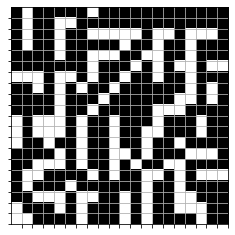

In [100]:
nrow=maze.nrow
ncol=maze.ncol
fig=plt.figure()
ax=fig.gca()
ax.set_xticks(np.arange(0.5,ncol,1))
ax.set_yticks(np.arange(0.5,nrow,1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid('on')
img=ax.imshow(maze.maze,cmap="gray",)
a=5

In [101]:
def gen_func():
    maze=Maze(arr,rat,cheese)
    
    done=False
    while not done:
        row,col,_=maze.state
        cell=(row,col)
        action=agent.get_policy(cell)
        maze.step(action)
        done=maze.get_status()
        yield maze.get_canvas()


In [102]:
def update_plot(canvas):
    img.set_data(canvas)

In [103]:
anim=animation.FuncAnimation(fig,update_plot,gen_func)

In [104]:
HTML(anim.to_html5_video())

In [105]:
anim.save("big_maze_anim.gif",animation.PillowWriter())